# 1. Training Several Different Linear Models (Full Dataset)

## Testing model training - exploration

### LinearRegression - Training model on Numerical Columns only --> Low Score 0.29

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
postcodes = pd.read_csv('data/zipcode-belgium.csv')
postcodes = postcodes.drop(columns=['lat', 'long'])
postcodes.head()

,postcode,locality
0,1000,Bruxelles
1,1020,Laeken
2,1030,Schaerbeek
3,1040,Etterbeek
4,1050,Ixelles


In [3]:
df = pd.read_csv('data/cleaned.csv').drop('Unnamed: 0', axis=1)
df.drop_duplicates()

numerical_cols = ['price','number_rooms', 'living_area', 'fireplace', 'furnished', 'terrace', 'garden', 'terrace_area', 'garden_area', 'surface_land', 'number_facades', 'swimming_pool', 'latitude', 'longitude']
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province','locality', 'postcode']

In [4]:
postalcode_merge_df = pd.merge(postcodes, df, on='locality', how='left')
postalcode_merge_df.drop_duplicates()

df = postalcode_merge_df.dropna()
df.head(500)

,postcode,locality,property_type,property_subtype,price,number_rooms,living_area,kitchen,furnished,fireplace,...,garden,garden_area,surface_land,number_facades,swimming_pool,building_state,region,province,latitude,longitude
0,1000,Bruxelles,HOUSE,HOUSE,698000.0,3.0,200.0,USA_HYPER_EQUIPPED,0.0,0.0,...,1.0,500.0,600.0,4.0,0.0,AS_NEW,Brussels,Brussels,50.846557,4.351697
1,1000,Bruxelles,HOUSE,VILLA,650000.0,4.0,270.0,SEMI_EQUIPPED,0.0,0.0,...,1.0,300.0,713.0,4.0,0.0,TO_RENOVATE,Brussels,Brussels,50.846557,4.351697
2,1000,Bruxelles,HOUSE,HOUSE,499000.0,4.0,155.0,HYPER_EQUIPPED,0.0,0.0,...,1.0,75.0,210.0,2.0,0.0,GOOD,Brussels,Brussels,50.846557,4.351697
3,1000,Bruxelles,APARTMENT,APARTMENT,385000.0,2.0,88.0,USA_INSTALLED,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,GOOD,Brussels,Brussels,50.846557,4.351697
4,1000,Bruxelles,APARTMENT,APARTMENT,365000.0,5.0,134.0,INSTALLED,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,GOOD,Brussels,Brussels,50.846557,4.351697
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1080,Molenbeek-Saint-Jean,APARTMENT,APARTMENT,174000.0,1.0,65.0,NOT_DEFINED,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,GOOD,Brussels,Brussels,50.854596,4.338636
496,1080,Molenbeek-Saint-Jean,HOUSE,APARTMENT_BLOCK,599000.0,5.0,300.0,HYPER_EQUIPPED,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,AS_NEW,Brussels,Brussels,50.854596,4.338636
497,1080,Molenbeek-Saint-Jean,HOUSE,APARTMENT_BLOCK,699000.0,4.0,160.0,NOT_DEFINED,0.0,0.0,...,0.0,0.0,500.0,2.0,0.0,UNKNOWN,Brussels,Brussels,50.854596,4.338636
498,1080,Molenbeek-Saint-Jean,APARTMENT,APARTMENT,249000.0,2.0,100.0,INSTALLED,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,UNKNOWN,Brussels,Brussels,50.854596,4.338636


In [5]:
df.columns
df.isna().sum()

postcode            0
locality            0
property_type       0
property_subtype    0
price               0
number_rooms        0
living_area         0
kitchen             0
furnished           0
fireplace           0
terrace             0
terrace_area        0
garden              0
garden_area         0
surface_land        0
number_facades      0
swimming_pool       0
building_state      0
region              0
province            0
latitude            0
longitude           0
dtype: int64

In [6]:
X = df[numerical_cols].drop(columns=['price'], axis=1)
y = df['price']

2023-07-24 12:03:16.684116: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-24 12:03:16.714816: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 12:03:16.953760: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-24 12:03:16.955133: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-24 12:03:17.981244: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 104710.9057
Mean squared error = 19800474035.9891
Median absolute error = 81523.7363
Explain variance score = 0.3249
R2 score *coefficient of Determination = 0.3248
--------------------------------------
TRAINING SCORE: 0.3198685017112771
TESTING SCORE: 0.32475497377237195
--------------------------------------
Cross validation scores: 
 [0.30916907 0.33427278 0.28984602 0.31961163 0.31813816]


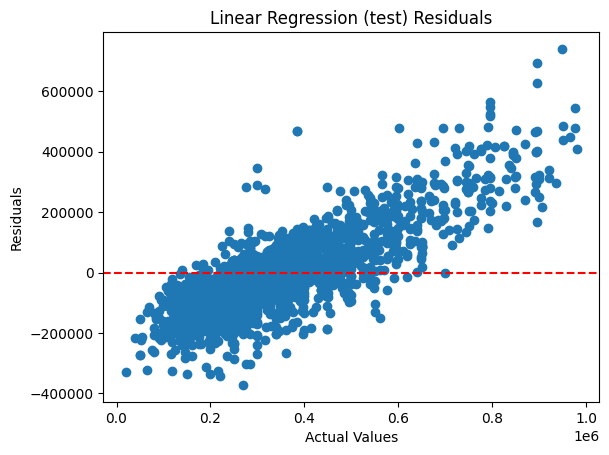

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


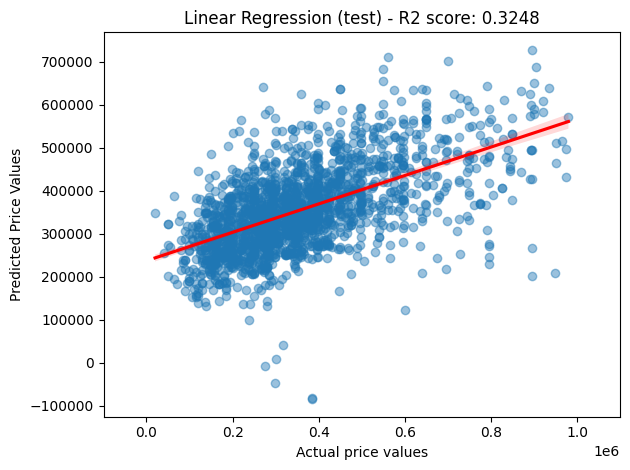

(array([309185.47639413, 296996.70891863, 286141.13079803, ...,
        458390.05800396, 538695.43126882, 341267.95293546]),
 622     325000.0
 2013    365000.0
 8103    345750.0
 1873    269000.0
 5105    174900.0
           ...   
 1470    525000.0
 3241    475000.0
 9962    275000.0
 7388    425000.0
 8257    745000.0
 Name: price, Length: 1889, dtype: float64)

In [7]:
from src.model_functions import train_linear_regr

train_linear_regr(X, y, 'Linear Regression (test)')

### Dropping less correlated numerical columns

In [8]:
df[numerical_cols].corr()['price'].sort_values(ascending=False)

price             1.000000
living_area       0.520740
number_rooms      0.409525
surface_land      0.237257
number_facades    0.175345
fireplace         0.136150
garden            0.134182
terrace_area      0.117371
terrace           0.113510
swimming_pool     0.096904
garden_area       0.092524
latitude          0.007480
furnished        -0.004397
longitude        -0.068915
Name: price, dtype: float64

In [9]:
numerical_cols = ['price','number_rooms', 'living_area', 'surface_land', 'number_facades', 'latitude', 'longitude']
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province',]

X = df[numerical_cols].drop(columns=['price'], axis=1)
y = df['price']

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 107053.6427
Mean squared error = 20428408197.1658
Median absolute error = 84334.0351
Explain variance score = 0.3036
R2 score *coefficient of Determination = 0.3033
--------------------------------------
TRAINING SCORE: 0.29835250972920613
TESTING SCORE: 0.303340869324048
--------------------------------------
Cross validation scores: 
 [0.29037349 0.32366242 0.27663235 0.28491522 0.29790427]


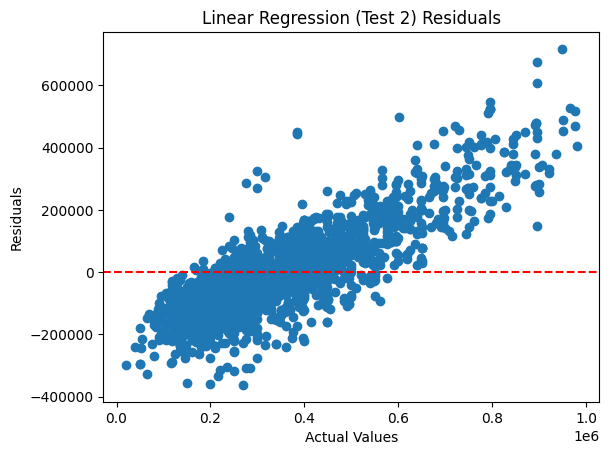

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


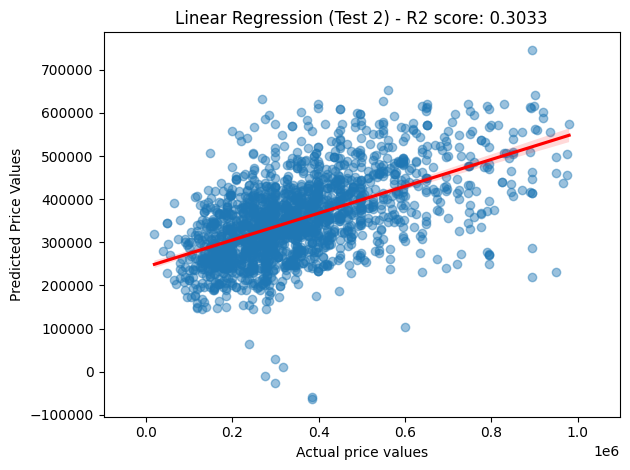

(array([331516.96454738, 325205.24162774, 280253.8486809 , ...,
        461396.13031726, 499466.73584544, 344304.6582419 ]),
 622     325000.0
 2013    365000.0
 8103    345750.0
 1873    269000.0
 5105    174900.0
           ...   
 1470    525000.0
 3241    475000.0
 9962    275000.0
 7388    425000.0
 8257    745000.0
 Name: price, Length: 1889, dtype: float64)

In [10]:
from src.model_functions import train_linear_regr

train_linear_regr(X, y, 'Linear Regression (Test 2)')

# 2. Selecting columns + insert Dummies


In [11]:
# Add the first 2 numbers of the postcode to the dataframe - see if any improvement in model
# NOTE: very slight increase in model performance - but training time is more than doubled - opted not to use this feature
df['postcode_abbr'] = df['postcode'].apply(lambda x: int(x/100))

/tmp/ipykernel_14284/1684750387.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['postcode_abbr'] = df['postcode'].apply(lambda x: int(x/100))


In [12]:
# including Locality to see if any difference ==> LOCALITY HAS NEGATIVE INFLUENCE7
# Included poistcode - negative influence on the models overall
cat_cols = ['property_type','property_subtype','kitchen','building_state','region','province']
numerical_cols = ['price','number_rooms', 'living_area', 'surface_land', 'number_facades','latitude','longitude']

dummies = pd.get_dummies(df[cat_cols], columns=cat_cols)

new_df = pd.concat([df[numerical_cols], dummies], axis=1)
new_df.reset_index().drop(columns=['index'], inplace=True)

new_df

,price,number_rooms,living_area,surface_land,number_facades,latitude,longitude,property_type_APARTMENT,property_type_HOUSE,property_subtype_APARTMENT,...,province_Brussels,province_East Flanders,province_Flemish Brabant,province_Hainaut,province_Limburg,province_Liège,province_Luxembourg,province_Namur,province_Walloon Brabant,province_West Flanders
0,698000.0,3.0,200.0,600.0,4.0,50.846557,4.351697,False,True,False,...,True,False,False,False,False,False,False,False,False,False
1,650000.0,4.0,270.0,713.0,4.0,50.846557,4.351697,False,True,False,...,True,False,False,False,False,False,False,False,False,False
2,499000.0,4.0,155.0,210.0,2.0,50.846557,4.351697,False,True,False,...,True,False,False,False,False,False,False,False,False,False
3,385000.0,2.0,88.0,0.0,3.0,50.846557,4.351697,True,False,True,...,True,False,False,False,False,False,False,False,False,False
4,365000.0,5.0,134.0,0.0,2.0,50.846557,4.351697,True,False,True,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10437,590000.0,4.0,297.0,742.0,4.0,51.208887,3.445221,False,True,False,...,False,True,False,False,False,False,False,False,False,False
10438,269000.0,2.0,186.0,169.0,2.0,51.208887,3.445221,False,True,False,...,False,True,False,False,False,False,False,False,False,False
10439,370000.0,3.0,146.0,1215.0,4.0,51.208887,3.445221,False,True,False,...,False,True,False,False,False,False,False,False,False,False
10440,335000.0,4.0,260.0,870.0,4.0,51.208887,3.445221,False,True,False,...,False,True,False,False,False,False,False,False,False,False


## Linear Regression --> score: 0.58

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 81351.5961
Mean squared error = 12297112277.8925
Median absolute error = 62936.0
Explain variance score = 0.5807
R2 score *coefficient of Determination = 0.5806
--------------------------------------
TRAINING SCORE: 0.5798523419274266
TESTING SCORE: 0.5806381257581426
--------------------------------------


Cross validation scores: 
 [ 5.46282314e-01  5.71468932e-01  5.75577116e-01 -3.71900837e+18
  5.84860200e-01]


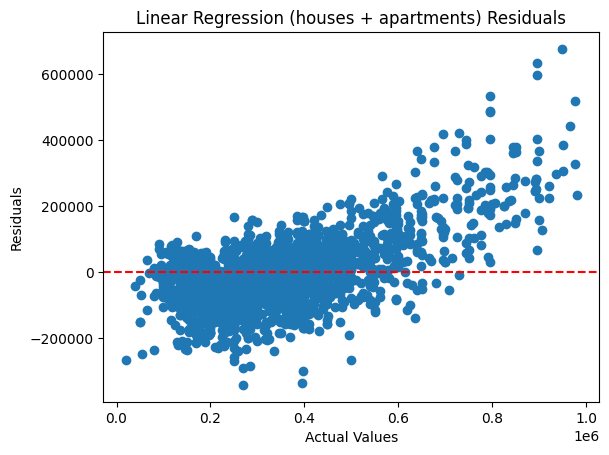

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


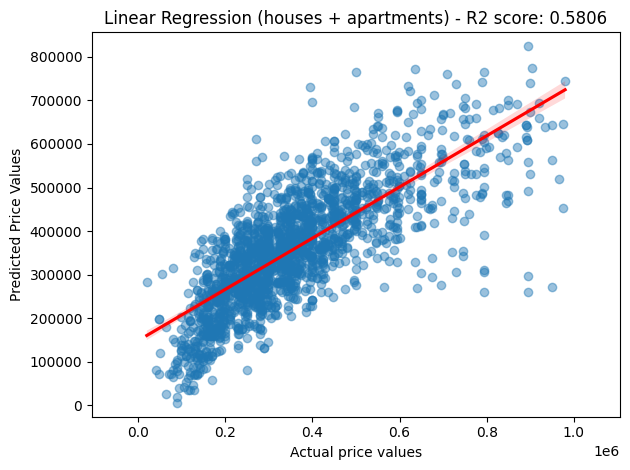

In [13]:
from src.model_functions import train_linear_regr

X = new_df.drop(columns=['price'], axis=1)
y = new_df['price']

#Training the Linear Model (LinearRegression) - and normalize the data with MinMaxScaler
y_preds, y_test = train_linear_regr(X, y, 'Linear Regression (houses + apartments)')


## Model K-Nearest Neighbour --> score: 0.58

In [14]:
from src.model_functions import train_knn_regr

X = new_df.drop(columns=['price'], axis=1)
y = new_df['price']

In [15]:
# Train the model (KNeighborsRegressor) with n_neighbors as 14 (see gridsearch below- best ne niegnbours)
# params = {'n_neighbors':14}
# print("Scores for the initial training (Without GridSearch)")
# model, X_train, X_test, y_train, y_test = train_knn_regr(X, y, 'KNN Regression (houses + apartments)', **params)

# # implementing GridSearch
# # Check for the best n_neighbor and other hyperparameters

# from sklearn.model_selection import GridSearchCV

# params = {"n_neighbors": np.arange(10,15), 
#           "metric": ["euclidean", "cityblock"],
#           "weights":['uniform', 'distance'],
#           "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}

# print('Calculating best parameters through GridSearchCV. . .')
# grid = GridSearchCV(estimator=model,param_grid=params)
# grid.fit(X_train, y_train)
# print(f'Best score: {grid.best_score_}')

# # Retrain the model with the optimal parameters

# best_params = grid.best_estimator_.get_params()
# print(f"The Best parameters found from GridSearchCV: {best_params}")

# model, X_train, X_test, y_train, y_test = train_knn_regr(X, y, 'KNN Regression (houses + apartments GridSearch)', **best_params)


## Polynomial regresssion (NOT useful if degree > 1) --> score: 0.58

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 81388.4431
Mean squared error = 12293731981.4246
Median absolute error = 63160.0
Explain variance score = 0.5808
R2 score *coefficient of Determination = 0.5808
--------------------------------------
TRAINING SCORE: 0.5797632268322961
TESTING SCORE: 0.5807534022092531
--------------------------------------
Cross validation scores: 
 [ 5.46363938e-01  5.64277058e-01  5.75489573e-01 -1.36473359e+19
  5.84826173e-01]


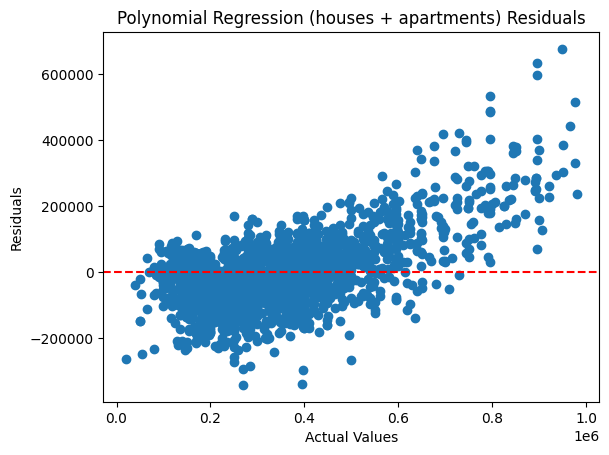

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


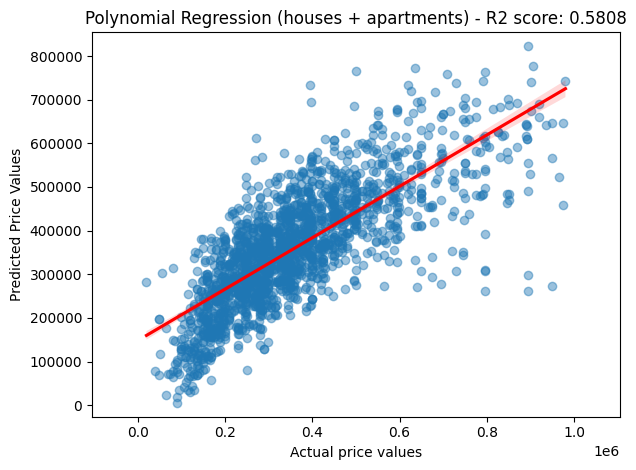

In [16]:
from src.model_functions import train_polynomial_regr

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

degree = 1
train_polynomial_regr(X, y, degree, 'Polynomial Regression (houses + apartments)')

## Huberregressor --> score: 0.57

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 79367.9613
Mean squared error = 12555310794.4747
Median absolute error = 59735.0762
Explain variance score = 0.5765
R2 score *coefficient of Determination = 0.5718
--------------------------------------
TRAINING SCORE: 0.5656109149823432
TESTING SCORE: 0.5718329191865958
--------------------------------------
Cross validation scores: 
 [0.53574942 0.56348767 0.55205963 0.56352555 0.5820735 ]


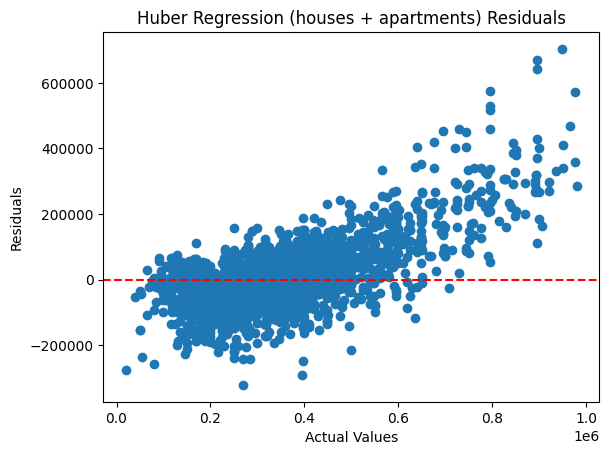

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


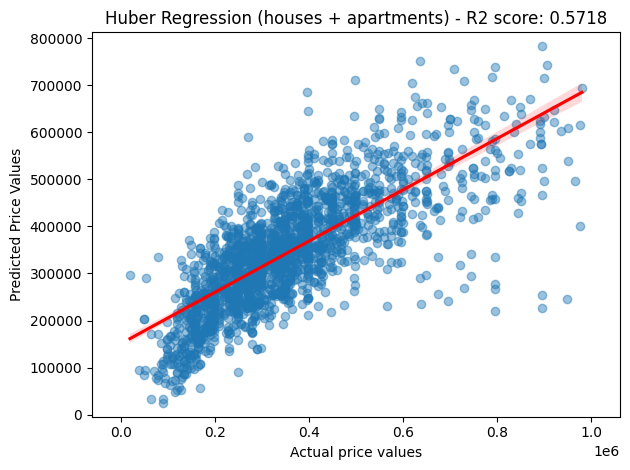

In [17]:
from src.model_functions import train_huberregressor

train_huberregressor(X,y, 'Huber Regression (houses + apartments)')

## Decision Tree Regressor --> score: 0.56

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 73629.5017
Mean squared error = 12647890641.7234
Median absolute error = 48000.0
Explain variance score = 0.5694
R2 score *coefficient of Determination = 0.5687
--------------------------------------
TRAINING SCORE: 0.9993332932162652
TESTING SCORE: 0.5686757179362613
--------------------------------------
Cross validation scores: 
 [0.50269937 0.48147916 0.45621581 0.54061736 0.41087608]


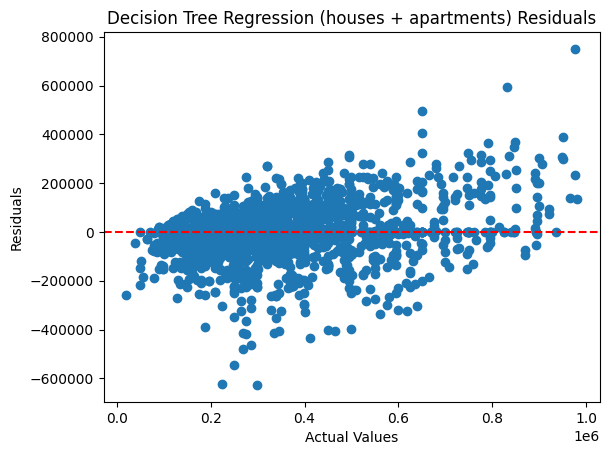

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


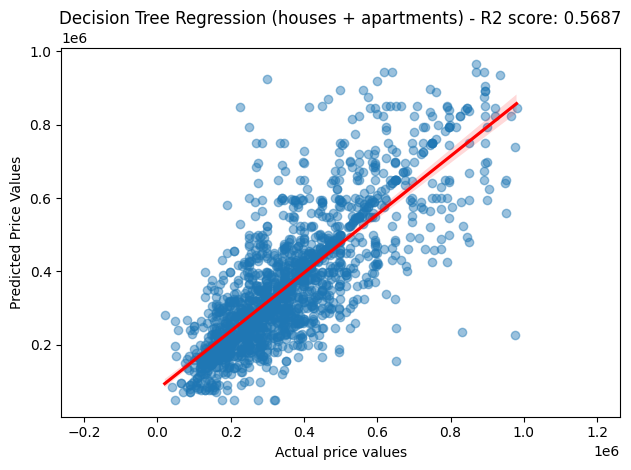

In [18]:
from src.model_functions import train_decessiontree_regression

X = new_df.drop(columns=['price'], axis=1)
y = new_df['price']

train_decessiontree_regression(X, y, 'Decision Tree Regression (houses + apartments)')

## Xgboost Regression --> score: 0.80

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 55106.2146
Mean squared error = 5930623830.4622
Median absolute error = 39612.2188
Explain variance score = 0.8003
R2 score *coefficient of Determination = 0.8003
--------------------------------------
TRAINING SCORE: 0.9312353223312904
TESTING SCORE: 0.8002727988338534
--------------------------------------
Cross validation scores: 
 [0.76768962 0.79782926 0.7632305  0.75950728 0.7517384 ]


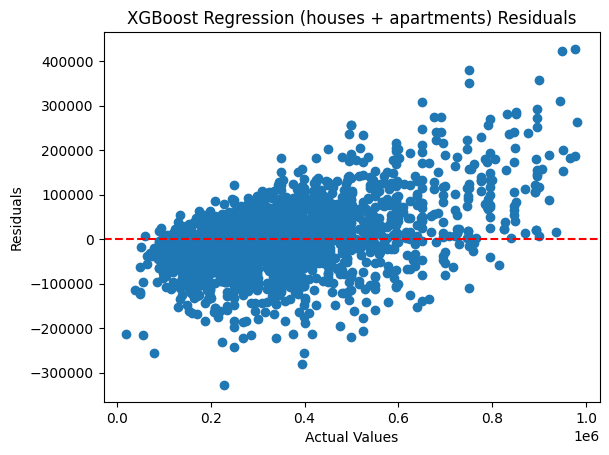

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


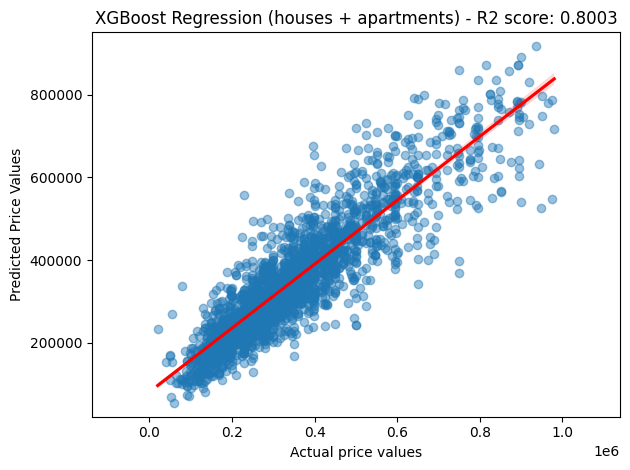

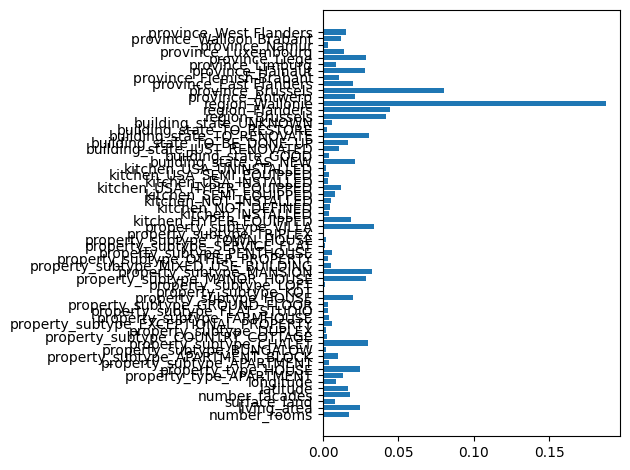

In [37]:
from src.model_functions import train_XGBoost_regression

grid_results = {'colsample_bytree': 0.3, 'gamma': 0.0, 'learning_rate': 0.15, 'max_depth': 8, 'min_child_weight': 1}

y_test, y_preds, model, X_train, y_train, X_test = train_XGBoost_regression(X, y, 'XGBoost Regression (houses + apartments)', **grid_results)

model.feature_importances_

plt.barh(X_test.columns, model.feature_importances_)
plt.tight_layout()

## Neural Network (Keras) --> 0.62

In [20]:
# USE tensorboard --logdir=./log/ to see the tensorboard interactive page
from src.model_functions import train_neural_network

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

# epochs = 300
# batch_size = 8
# train_neural_network(X,y, epochs, batch_size)

## Stochastic Gradient Descent - SGDRegressor --> score: 0.58

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 81489.6232
Mean squared error = 12244551266.3689
Median absolute error = 63894.0761
Explain variance score = 0.5883
R2 score *coefficient of Determination = 0.5882
--------------------------------------
TRAINING SCORE: 0.5759041865309504
TESTING SCORE: 0.5882450853411358
--------------------------------------
Cross validation scores: 
 [0.54340293 0.56006738 0.58452578 0.57527964 0.58288728]


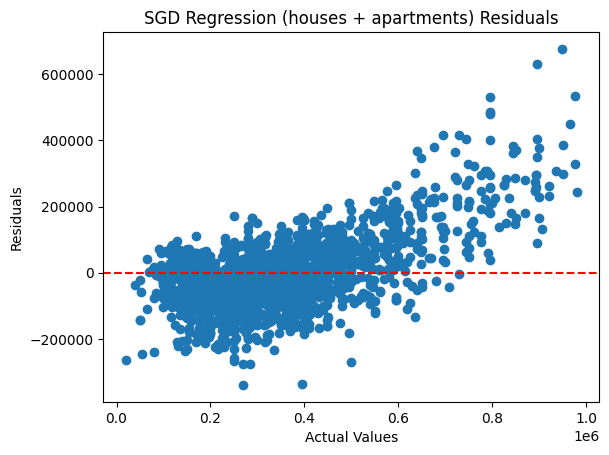

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


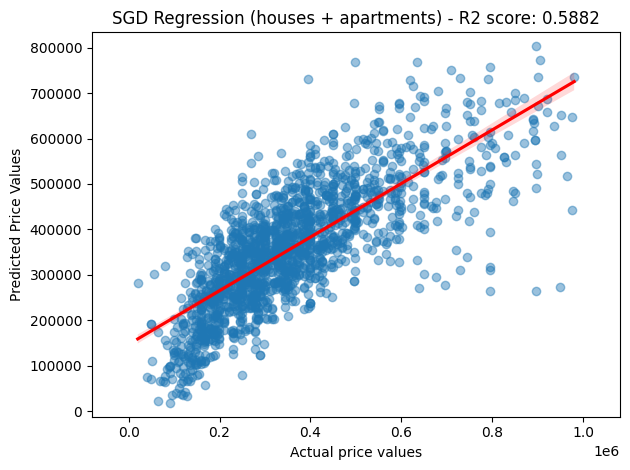

In [21]:
from src.model_functions import train_SGDregressor

X = new_df.drop(columns=['price'], axis=1)
y = df['price']

train_SGDregressor(X, y, 'SGD Regression (houses + apartments)')

# 3. Training on split Type Houses and Apartments

In [22]:
df_house = new_df[new_df['property_type_HOUSE'] == 1]
df_app = new_df[new_df['property_type_APARTMENT'] == 1]

X_house = df_house.drop(columns=['price'], axis=1)
y_house = df_house['price']

X_app = df_app.drop(columns=['price'], axis=1)
y_app = df_app['price']

## Linear Regression

### House --> 0.63

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 78656.5337
Mean squared error = 11344728018.8809
Median absolute error = 59584.0
Explain variance score = 0.632
R2 score *coefficient of Determination = 0.6309
--------------------------------------
TRAINING SCORE: 0.6716441120417997
TESTING SCORE: 0.6309056548707214
--------------------------------------


Cross validation scores: 
 [0.66341144 0.65528925 0.65433078 0.66098965 0.6837253 ]


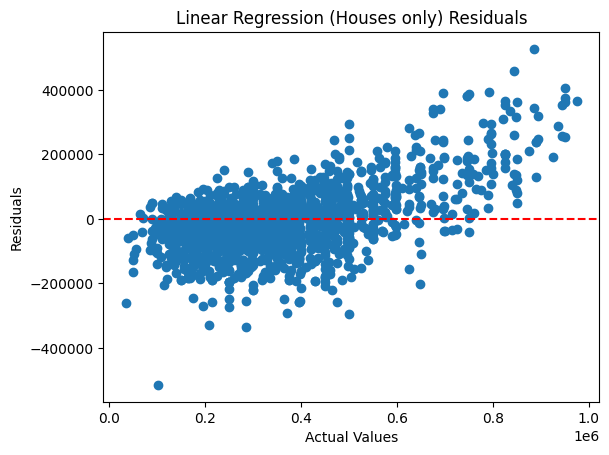

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


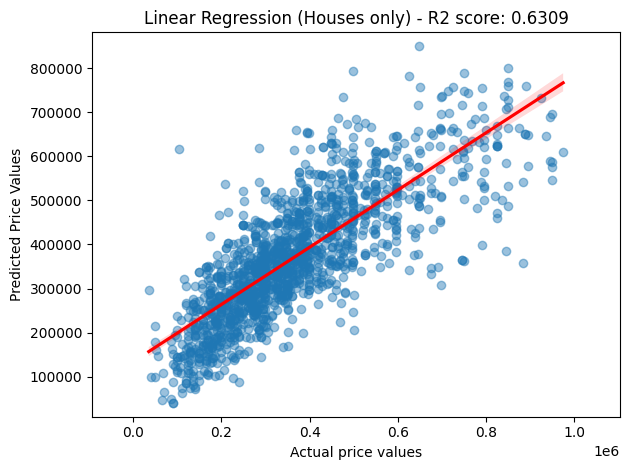

(array([250464., 228560., 215744., ..., 850976., 282896., 288720.]),
 1342    210000.0
 7094    229000.0
 4817    229000.0
 1404    365000.0
 9374    450000.0
           ...   
 5939    149000.0
 5610    295000.0
 476     649000.0
 6347    195000.0
 8483    175000.0
 Name: price, Length: 1469, dtype: float64)

In [23]:
from src.model_functions import train_linear_regr
import matplotlib.pyplot as plt

train_linear_regr(X_house,y_house, 'Linear Regression (Houses only)')

### Apartments --> 0.42

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 82594.3468
Mean squared error = 13707318764.9881
Median absolute error = 60392.0
Explain variance score = 0.4293
R2 score *coefficient of Determination = 0.4279
--------------------------------------
TRAINING SCORE: 0.47898402514169414
TESTING SCORE: 0.427858991005727
--------------------------------------
Cross validation scores: 
 [-1.29931891e+23  4.34709093e-01  1.93798820e-01  4.94896400e-01
  4.90961776e-01]


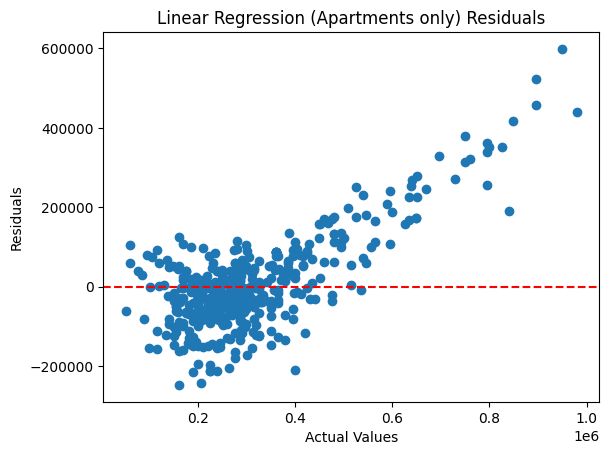

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


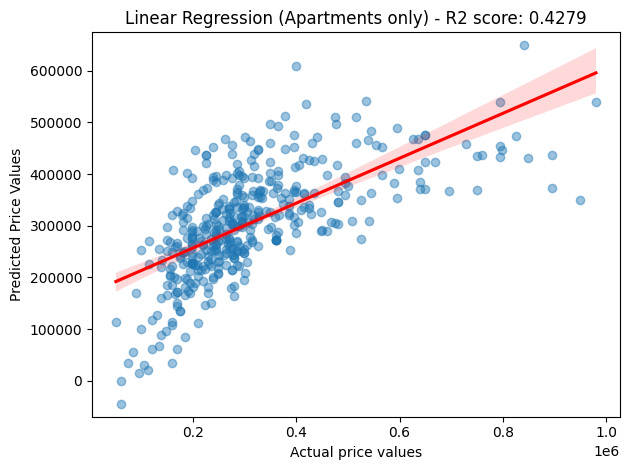

(array([ 3.88096e+05,  4.32000e+05,  2.32448e+05,  1.50784e+05,
         2.99520e+04,  3.34848e+05,  2.77504e+05,  1.69216e+05,
         4.27008e+05,  2.91584e+05,  2.76224e+05,  1.84576e+05,
         2.24512e+05,  3.64032e+05,  2.11968e+05,  3.16416e+05,
         3.92192e+05,  2.74176e+05,  2.02240e+05,  3.08736e+05,
         3.24992e+05,  2.28096e+05,  2.50880e+05,  4.17280e+05,
         1.12896e+05,  4.17024e+05,  9.71520e+04,  2.90304e+05,
         4.60800e+05,  1.44128e+05,  3.03232e+05,  2.91328e+05,
         3.86944e+05,  1.97120e+05,  2.89792e+05,  4.35456e+05,
         2.50880e+05,  3.14880e+05,  3.13088e+05,  2.25280e+05,
         3.29088e+05,  3.64032e+05,  3.07712e+05,  3.08480e+05,
         2.46784e+05,  3.16032e+05,  3.07712e+05,  3.72224e+05,
         2.14784e+05,  4.39296e+05,  3.40480e+05,  3.61472e+05,
         3.92832e+05,  2.01216e+05,  1.60768e+05,  2.76992e+05,
         2.54976e+05,  2.97984e+05,  3.08224e+05,  4.67456e+05,
         3.24608e+05,  3.59424e+05,  5.4

In [24]:
# NOT ENOUGH DATAPOINTS - IF SKEWED RESULT --> REMOVE POSTCODE ABBR feature
train_linear_regr(X_app,y_app, 'Linear Regression (Apartments only)')

## KNN nearest neighbour

### House

In [25]:
# Train the model (KNeighborsRegressor) with n_neighbors as 14 (see gridsearch below- best ne niegnbours)
# params = {'n_neighbors':14}
# print("Scores for the initial training (Without GridSearch)")
# model, X_train, X_test, y_train, y_test = train_knn_regr(X_house,y_house, 'KNN Regression (houses only)', **params)

# # implementing GridSearch
# # Check for the best n_neighbor and other hyperparameters

# from sklearn.model_selection import GridSearchCV

# params = {"n_neighbors": np.arange(10,15), 
#           "metric": ["euclidean", "cityblock"],
#           "weights":['uniform', 'distance'],
#           "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}

# print('Calculating best parameters through GridSearchCV. . .')
# grid = GridSearchCV(estimator=model,param_grid=params)
# grid.fit(X_train, y_train)
# print(f'Best score: {grid.best_score_}')

# # Retrain the model with the optimal parameters

# best_params = grid.best_estimator_.get_params()
# print(f"The Best parameters found from GridSearchCV: {best_params}")

# model, X_train, X_test, y_train, y_test = train_knn_regr(X_house,y_house, 'KNN Regression (Houses only) - GridSearch', **best_params)


### Apartments

In [26]:
# Train the model (KNeighborsRegressor) with n_neighbors as 14 (see gridsearch below- best ne niegnbours)
# params = {'n_neighbors':14}
# print("Scores for the initial training (Without GridSearch)")
# model, X_train, X_test, y_train, y_test = train_knn_regr(X_app,y_app, 'KNN Regression (apartments only)', **params)

# # implementing GridSearch
# # Check for the best n_neighbor and other hyperparameters

# from sklearn.model_selection import GridSearchCV

# params = {"n_neighbors": np.arange(10,15), 
#           "metric": ["euclidean", "cityblock"],
#           "weights":['uniform', 'distance'],
#           "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute']}

# print('Calculating best parameters through GridSearchCV. . .')
# grid = GridSearchCV(estimator=model,param_grid=params)
# grid.fit(X_train, y_train)
# print(f'Best score: {grid.best_score_}')

# # Retrain the model with the optimal parameters

# best_params = grid.best_estimator_.get_params()
# print(f"The Best parameters found from GridSearchCV: {best_params}")

# model, X_train, X_test, y_train, y_test = train_knn_regr(X_app,y_app, 'KNN Regression (Apartments only) - GridSearch', **best_params)


## HuberRegression

### House

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 77494.2771
Mean squared error = 11556908912.9665
Median absolute error = 57065.9749
Explain variance score = 0.6244
R2 score *coefficient of Determination = 0.624
--------------------------------------
TRAINING SCORE: 0.6637142631223514
TESTING SCORE: 0.6240024688250836
--------------------------------------
Cross validation scores: 
 [0.65308724 0.65199637 0.64684455 0.66147625 0.67624638]


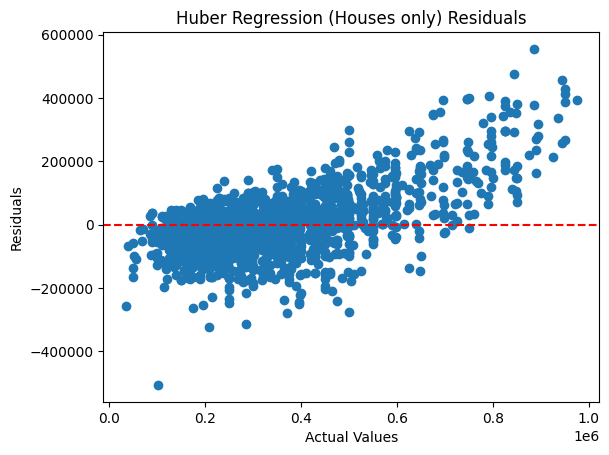

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


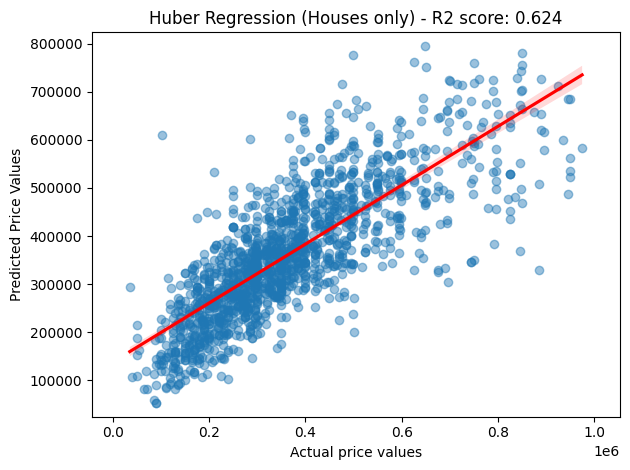

In [27]:
from src.model_functions import train_huberregressor

train_huberregressor(X_house,y_house, 'Huber Regression (Houses only)')

### Apartments

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 79328.8198
Mean squared error = 15326031345.7778
Median absolute error = 52983.8193
Explain variance score = 0.3843
R2 score *coefficient of Determination = 0.3603
--------------------------------------
TRAINING SCORE: 0.41027530068386586
TESTING SCORE: 0.3602942203074433
--------------------------------------
Cross validation scores: 
 [0.41743087 0.36684106 0.36890443 0.42345354 0.37146714]


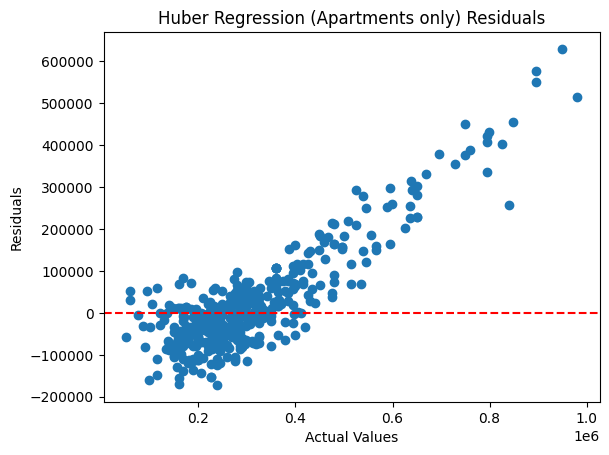

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


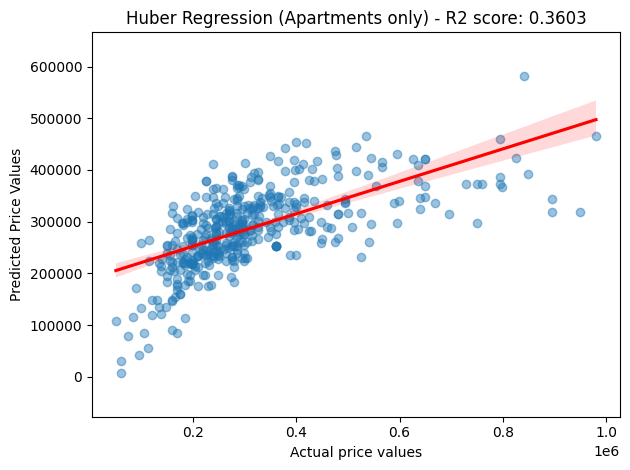

In [28]:
from src.model_functions import train_huberregressor

train_huberregressor(X_app,y_app, 'Huber Regression (Apartments only)')

## Decision Tree Regression

### House

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 77407.401
Mean squared error = 13595196702.8673
Median absolute error = 50000.0
Explain variance score = 0.558
R2 score *coefficient of Determination = 0.5577
--------------------------------------
TRAINING SCORE: 0.999765394940186
TESTING SCORE: 0.5576879220376829
--------------------------------------
Cross validation scores: 
 [0.51524863 0.46885257 0.45778498 0.46710852 0.56204476]


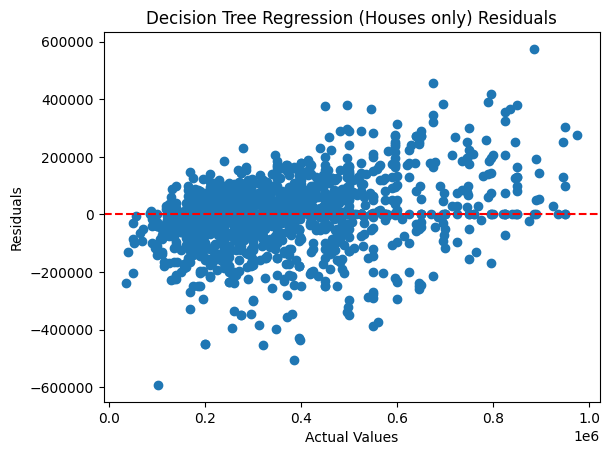

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


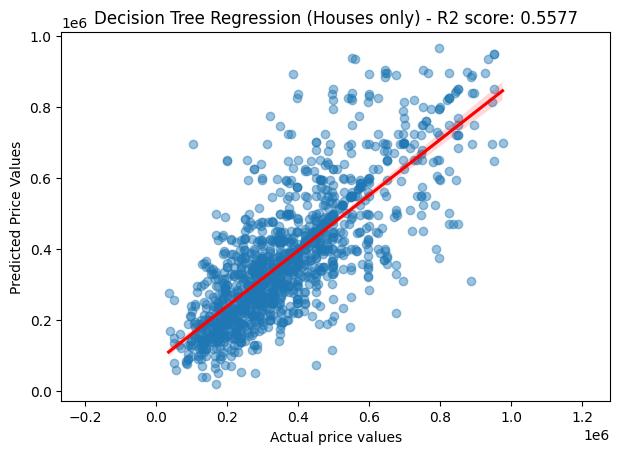

In [29]:
from src.model_functions import train_decessiontree_regression

train_decessiontree_regression(X_house, y_house, 'Decision Tree Regression (Houses only)')

### Apartments

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 67551.9873
Mean squared error = 12034054080.1679
Median absolute error = 35000.0
Explain variance score = 0.5003
R2 score *coefficient of Determination = 0.4977
--------------------------------------
TRAINING SCORE: 0.9985756950301382
TESTING SCORE: 0.49770075667129565
--------------------------------------
Cross validation scores: 
 [0.3350925  0.27923535 0.50321495 0.22088628 0.61390986]


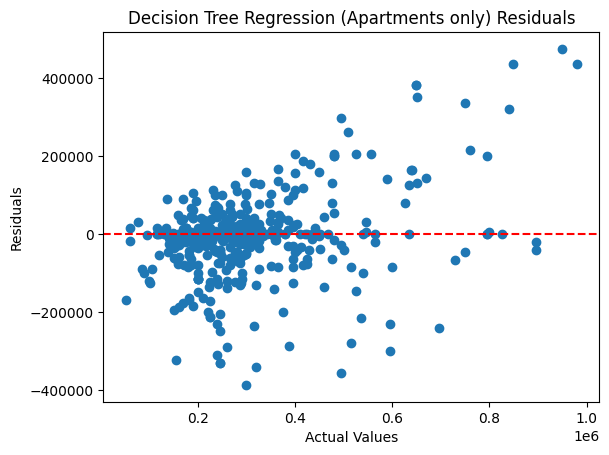

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


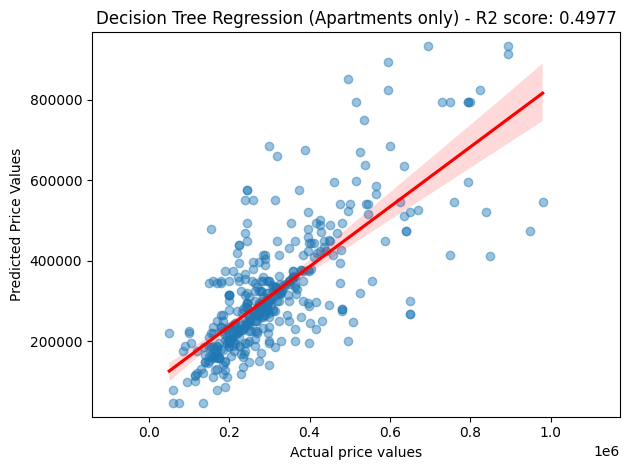

In [30]:
from src.model_functions import train_decessiontree_regression

train_decessiontree_regression(X_app, y_app, 'Decision Tree Regression (Apartments only)')

## XGBoost

### House --> score: 0.76

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 60596.1372
Mean squared error = 7358407839.2915
Median absolute error = 43299.8906
Explain variance score = 0.7622
R2 score *coefficient of Determination = 0.7617
--------------------------------------
TRAINING SCORE: 0.9535248956755563
TESTING SCORE: 0.7616792742227547
--------------------------------------
Cross validation scores: 
 [0.73096471 0.75245276 0.78036357 0.75297827 0.77505793]


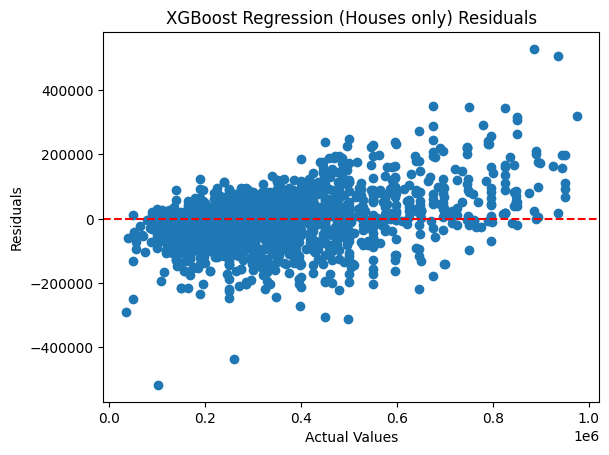

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


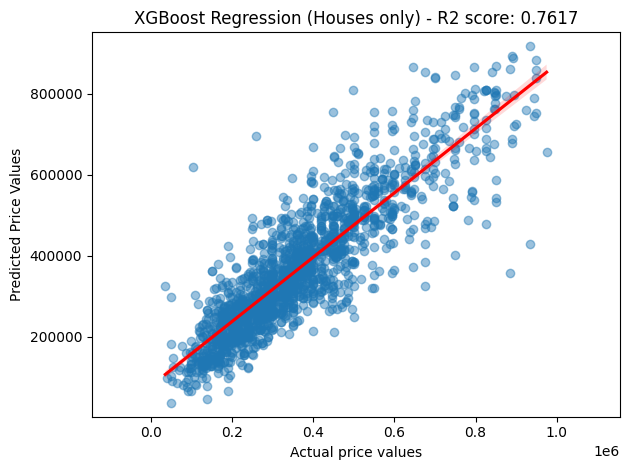

In [31]:
# HOUSE PREDICTIONS
from src.model_functions import train_XGBoost_regression

y_test, y_preds, model, X_train, y_train, X_test = train_XGBoost_regression(X_house, y_house, 'XGBoost Regression (Houses only)')



### Apartments --> score: 0.71

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 48084.2147
Mean squared error = 5711329895.9172
Median absolute error = 31167.0547
Explain variance score = 0.7482
R2 score *coefficient of Determination = 0.7481
--------------------------------------
TRAINING SCORE: 0.9872199497159023
TESTING SCORE: 0.7480915364374845
--------------------------------------
Cross validation scores: 
 [0.67286881 0.70278202 0.69781929 0.70240698 0.76522312]


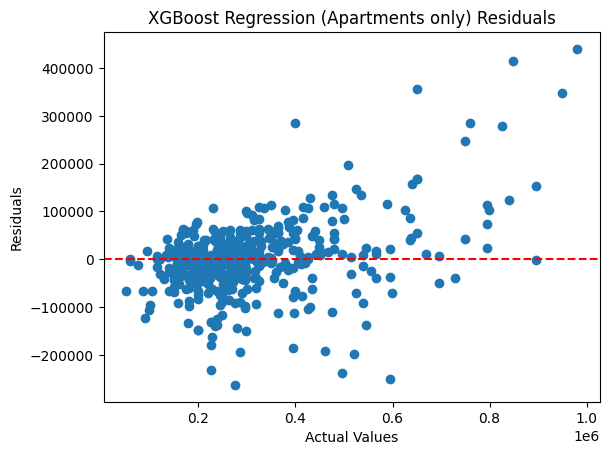

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


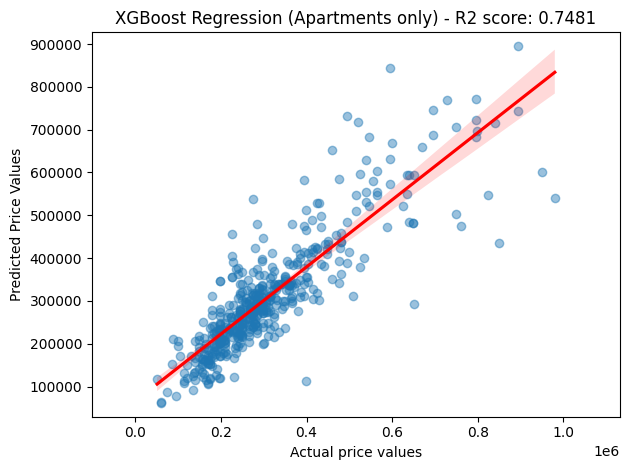

(123      259000.0
 10186    849000.0
 926      230000.0
 3599     169000.0
 7428     105000.0
            ...   
 2277     199000.0
 8155     283250.0
 9030     208938.0
 3338     299000.0
 4042     267000.0
 Name: price, Length: 478, dtype: float64,
 array([306283.97 , 434374.47 , 232300.97 , 186662.89 , 170880.3  ,
        334705.1  , 217707.33 , 121945.4  , 424421.1  , 281476.78 ,
        230382.73 , 191570.45 , 177331.16 , 682694.9  , 234840.97 ,
        312289.2  , 369826.5  , 595616.25 , 209207.17 , 290636.38 ,
        278448.84 , 200953.62 , 309510.47 , 423107.9  , 118492.05 ,
        410801.66 , 141062.05 , 422136.9  , 301964.4  , 104773.   ,
        277250.75 , 248811.98 , 288329.7  , 172658.84 , 206644.73 ,
        502358.7  , 178575.11 , 197722.52 , 358588.66 , 108259.22 ,
        339301.03 , 393858.3  , 452903.47 , 286867.97 , 203894.23 ,
        404224.16 , 298180.78 , 341991.47 , 223715.28 , 411979.78 ,
        447952.9  , 415360.84 , 182002.9  , 162776.25 , 132666.53 ,


In [32]:
# HOUSE PREDICTIONS
from src.model_functions import train_XGBoost_regression

train_XGBoost_regression(X_app, y_app, 'XGBoost Regression (Apartments only)')

## Neural network (Keras)

### House --> score: 0.61

In [33]:
from src.model_functions import train_neural_network

# USE tensorboard --logdir=./log/ to see the tensorboard interactive page
# Increasing epochs --> model scores up to 0.64

epochs = 300
batch_size = 8
# train_neural_network(X_house,y_house, epochs, batch_size)

### Apartments --> score: 0.33

In [34]:
# USE tensorboard --logdir=./log/ to see the tensorboard interactive page
epochs = 300
batch_size = 8
train_neural_network(X_app, y_app, epochs, batch_size)

Epoch 1/300
191/191 [==============================] - 1s 2ms/step - loss: 314981.2188
Epoch 2/300
 74/191 [==========>...................] - ETA: 0s - loss: 314264.5938

/home/niko/Desktop/GitHub Projects/ImmoElizaDataAnalysis/.env/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


191/191 [==============================] - 0s 2ms/step - loss: 314261.5000
Epoch 3/300
191/191 [==============================] - 0s 1ms/step - loss: 311521.8438
Epoch 4/300
191/191 [==============================] - 0s 1ms/step - loss: 305450.1875
Epoch 5/300
191/191 [==============================] - 0s 1ms/step - loss: 295066.6250
Epoch 6/300
191/191 [==============================] - 0s 1ms/step - loss: 279508.5625
Epoch 7/300
191/191 [==============================] - 0s 1ms/step - loss: 257987.2656
Epoch 8/300
191/191 [==============================] - 0s 1ms/step - loss: 230235.5156
Epoch 9/300
191/191 [==============================] - 0s 2ms/step - loss: 196749.3125
Epoch 10/300
191/191 [==============================] - 0s 2ms/step - loss: 160847.7344
Epoch 11/300
191/191 [==============================] - 0s 2ms/step - loss: 131024.3125
Epoch 12/300
191/191 [==============================] - 0s 1ms/step - loss: 113127.5781
Epoch 13/300
191/191 [==============================

KeyboardInterrupt: 

## SGD Regression

### House

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 78983.3179
Mean squared error = 11591861642.9263
Median absolute error = 58176.3327
Explain variance score = 0.6278
R2 score *coefficient of Determination = 0.6274
--------------------------------------
TRAINING SCORE: 0.6701651601508314
TESTING SCORE: 0.6274097456961838
--------------------------------------
Cross validation scores: 
 [0.6590929  0.65534336 0.65190213 0.66571486 0.68580785]


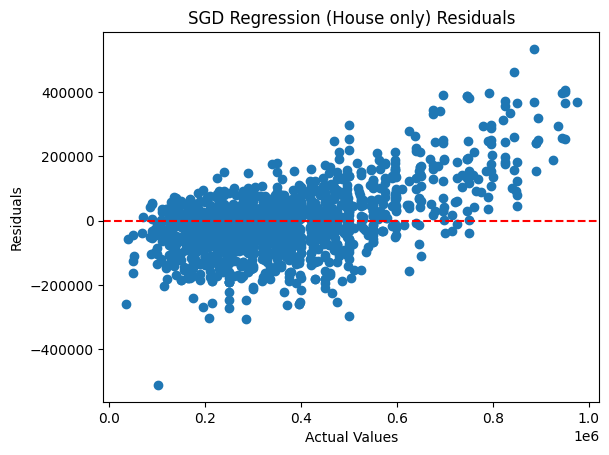

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


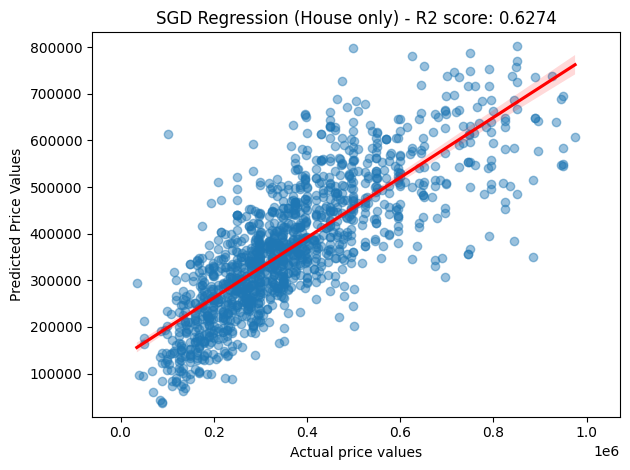

In [ ]:
from src.model_functions import train_SGDregressor

train_SGDregressor(X_house, y_house, 'SGD Regression (House only)')

### Apartments

General metrics for Linear models: 
--------------------------------------
Mean absolute error = 80354.3287
Mean squared error = 12986701271.2089
Median absolute error = 57983.4765
Explain variance score = 0.4196
R2 score *coefficient of Determination = 0.4195
--------------------------------------
TRAINING SCORE: 0.4716598374986698
TESTING SCORE: 0.4195105246095895
--------------------------------------
Cross validation scores: 
 [0.4384766  0.46523935 0.4237227  0.47119901 0.46976389]


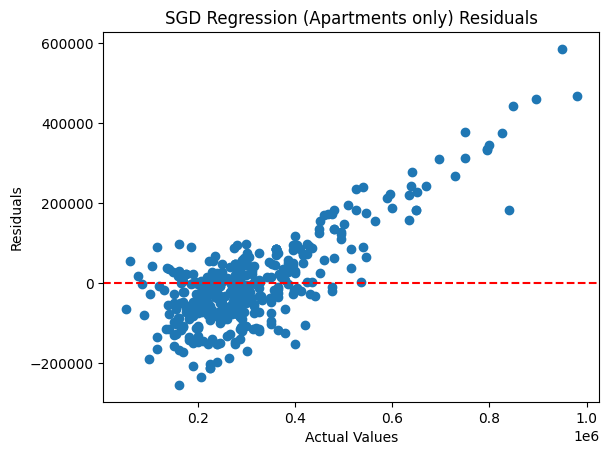

--------------------------------------
Saving the graph in output/model_graphs
--------------------------------------


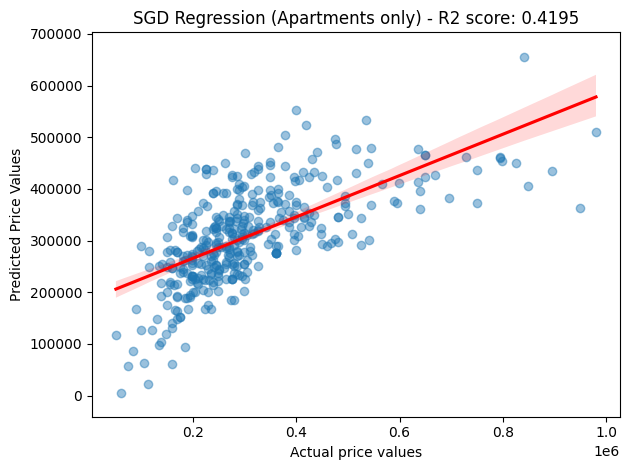

In [ ]:
from src.model_functions import train_SGDregressor

train_SGDregressor(X_app, y_app, 'SGD Regression (Apartments only)')